In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime

In [2]:
df = pd.read_csv('AirPassengers.csv')

In [3]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df['Month'] = pd.to_datetime(df['Month'])

In [5]:
df =  df.set_index(['Month'])

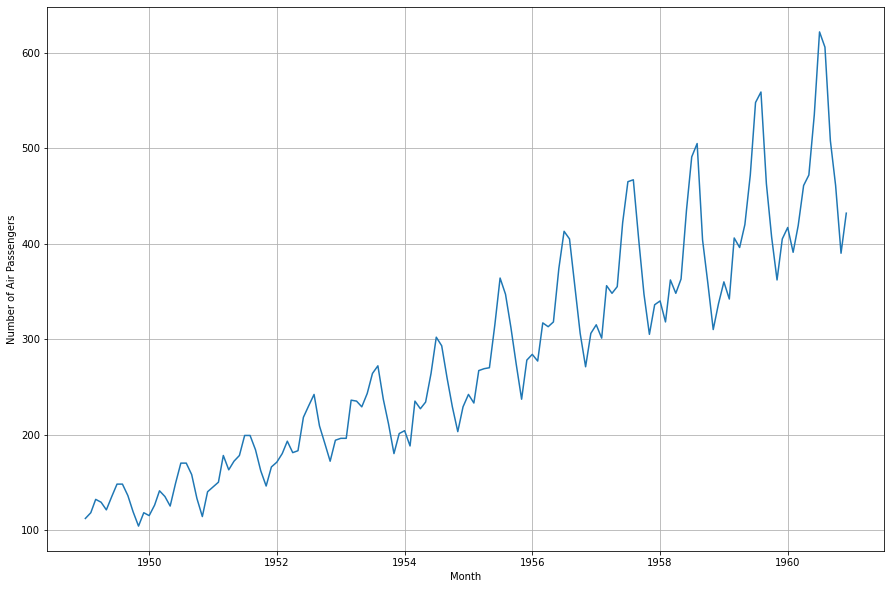

In [6]:
plt.figure(figsize=(15,10))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(df)
plt.grid()

<AxesSubplot:xlabel='Month'>

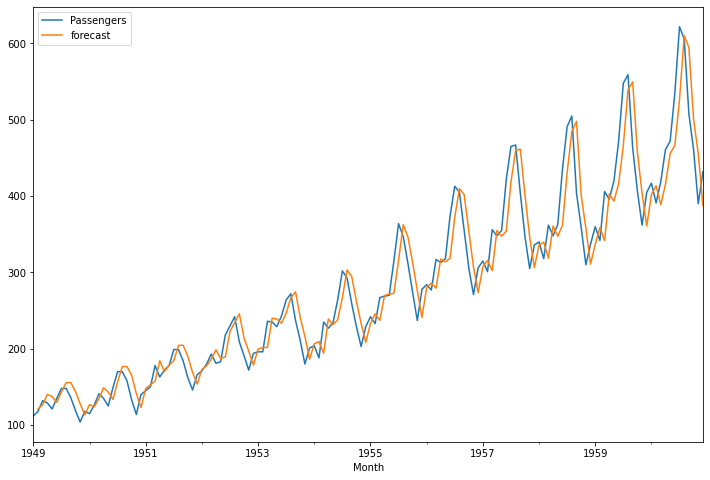

In [82]:
from statsmodels.tsa.ar_model import AutoReg
# fit model
model = AutoReg(df['Passengers'], lags=1)
model_fit = model.fit()
# make prediction
df['forecast'] = model_fit.predict(start=0,end=144)
df[['Passengers','forecast']].plot(figsize=(12,8))

In [84]:
df.head(10)

,Passengers,forecast
Month,,
1949-01-01,112,NaN
1949-02-01,118,121.105886
1949-03-01,132,126.859478
1949-04-01,129,140.284526
1949-05-01,121,137.407730
1949-06-01,135,129.736274
1949-07-01,148,143.161322
1949-08-01,148,155.627438
1949-09-01,136,155.627438


In [85]:
df['forecast_floor'] = df['forecast'].apply(np.floor)
df['forecast_ceil'] = df['forecast'].apply(np.ceil)
print(df.head(10))

            Passengers    forecast  forecast_floor  forecast_ceil
Month                                                            
1949-01-01         112         NaN             NaN            NaN
1949-02-01         118  121.105886           121.0          122.0
1949-03-01         132  126.859478           126.0          127.0
1949-04-01         129  140.284526           140.0          141.0
1949-05-01         121  137.407730           137.0          138.0
1949-06-01         135  129.736274           129.0          130.0
1949-07-01         148  143.161322           143.0          144.0
1949-08-01         148  155.627438           155.0          156.0
1949-09-01         136  155.627438           155.0          156.0
1949-10-01         119  144.120254           144.0          145.0


In [86]:
df.head(24)

,Passengers,forecast,forecast_floor,forecast_ceil
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,121.105886,121.0,122.0
1949-03-01,132,126.859478,126.0,127.0
1949-04-01,129,140.284526,140.0,141.0
1949-05-01,121,137.407730,137.0,138.0
1949-06-01,135,129.736274,129.0,130.0
1949-07-01,148,143.161322,143.0,144.0
1949-08-01,148,155.627438,155.0,156.0
1949-09-01,136,155.627438,155.0,156.0


In [89]:
import numpy as np

def mse(actual, pred,lags): 
    actual = actual[lags:,].to_numpy()
    pred = pred[lags:,].to_numpy()
    return np.square(np.subtract(actual,pred)).mean() 
mse(df['Passengers'],df['forecast_ceil'],1)

1107.7412587412587

C:\Users\mayuri.mhetre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mayuri.mhetre\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\mayuri.mhetre\Anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


<AxesSubplot:xlabel='Month'>

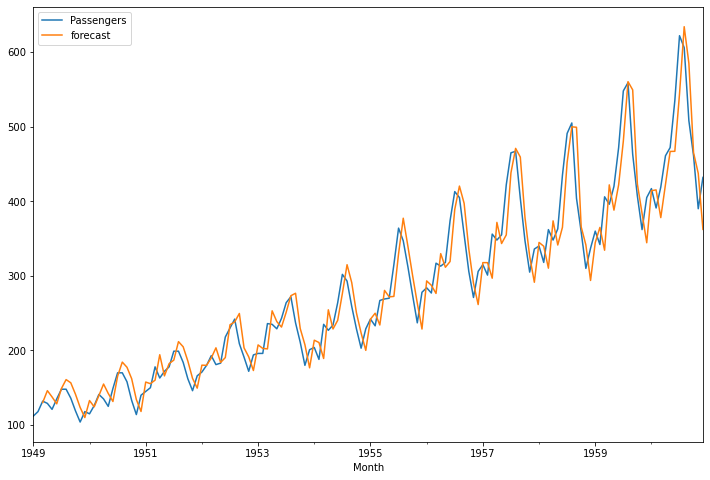

In [10]:
from statsmodels.tsa.ar_model import AutoReg
# fit model
model = AutoReg(df['Passengers'], lags=2)
model_fit = model.fit()
# make prediction
df['forecast'] = model_fit.predict(start=0,end=144)
df[['Passengers','forecast']].plot(figsize=(12,8))

In [11]:
import numpy as np

def mse(actual, pred,lags): 
    actual = actual[lags:,].to_numpy()
    pred = pred[lags:,].to_numpy()
    return np.square(np.subtract(actual,pred)).mean() 
mse(df['Passengers'],df['forecast'],2)

994.3745287132368

C:\Users\mayuri.mhetre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mayuri.mhetre\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\mayuri.mhetre\Anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


<AxesSubplot:xlabel='Month'>

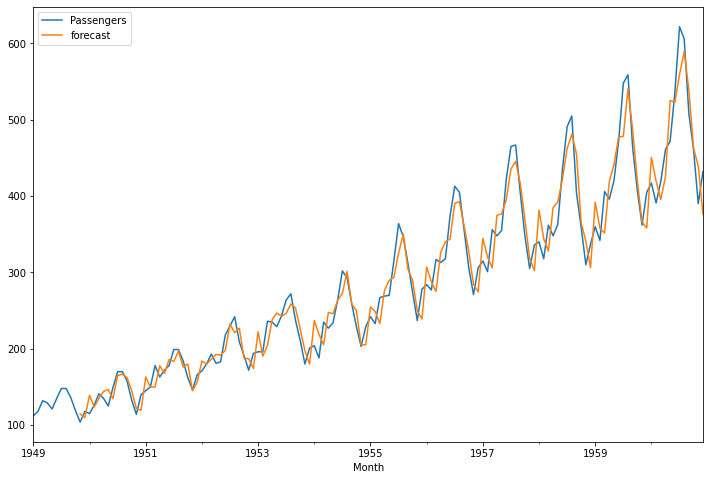

In [29]:
from statsmodels.tsa.ar_model import AutoReg
# fit model
model = AutoReg(df['Passengers'], lags=10)
model_fit = model.fit()
# make prediction
df['forecast'] = model_fit.predict(start=0,end=144)
df[['Passengers','forecast']].plot(figsize=(12,8))

In [30]:

def mse(actual, pred,lags): 
    actual = actual[lags:,].to_numpy()
    pred = pred[lags:,].to_numpy()
    return np.square(np.subtract(actual,pred)).mean() 
mse(df['Passengers'],df['forecast'],10)

596.1502046110908

<AxesSubplot:xlabel='Month'>

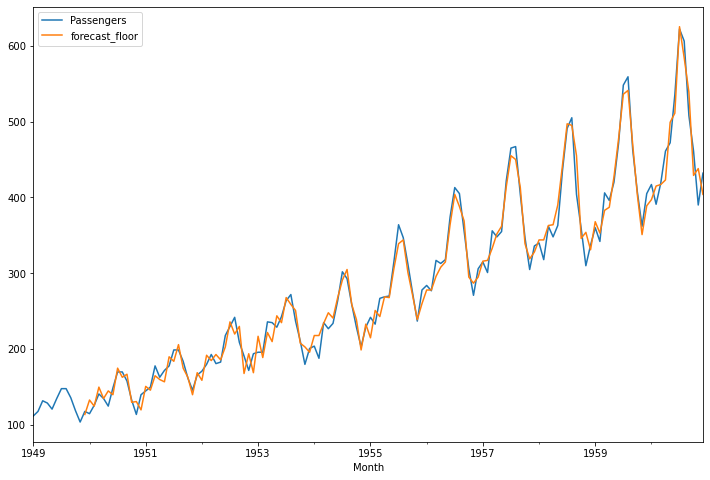

In [90]:
from statsmodels.tsa.ar_model import AutoReg
# fit model
model = AutoReg(df['Passengers'], lags=11)
model_fit = model.fit()
# make prediction
df['forecast'] = model_fit.predict(start=0,end=144)
df['forecast_floor'] = df['forecast'].apply(np.floor)
df['forecast_ceil'] = df['forecast'].apply(np.ceil)
df[['Passengers','forecast_floor']].plot(figsize=(12,8))

In [91]:

def mse(actual, pred,lags): 
    actual = actual[lags:,].to_numpy()
    pred = pred[lags:,].to_numpy()
    return np.square(np.subtract(actual,pred)).mean() 
mse(df['Passengers'],df['forecast_floor'],11)

259.4736842105263

In [92]:

def mse(actual, pred,lags): 
    actual = actual[lags:,].to_numpy()
    pred = pred[lags:,].to_numpy()
    return np.square(np.subtract(actual,pred)).mean() 
mse(df['Passengers'],df['forecast_ceil'],11)

259.5112781954887

############## NOTE : obeservation 1: lags =11 has the lowest MSE 259.47 ###############

<AxesSubplot:xlabel='Month'>

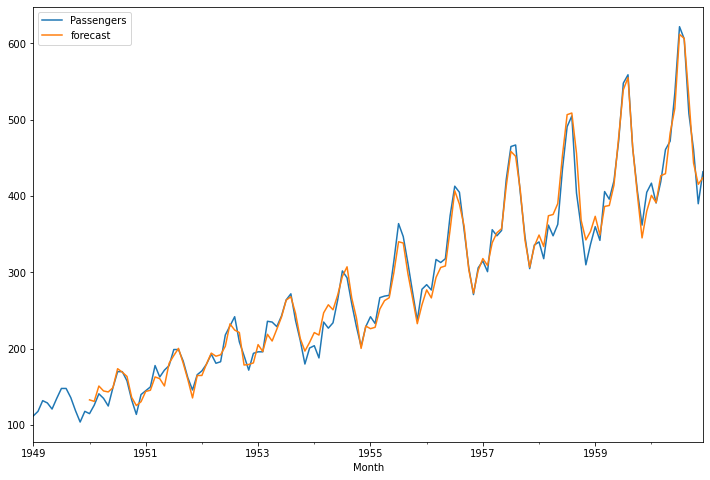

In [93]:
from statsmodels.tsa.ar_model import AutoReg
# fit model
model = AutoReg(df['Passengers'], lags=12)
model_fit = model.fit()
# make prediction
df['forecast'] = model_fit.predict(start=0,end=144)
df[['Passengers','forecast']].plot(figsize=(12,8))

In [94]:
df['forecast_floor'] = df['forecast'].apply(np.floor)
df['forecast_ceil'] = df['forecast'].apply(np.ceil)
def mse(actual, pred,lags): 
    actual = actual[lags:,].to_numpy()
    pred = pred[lags:,].to_numpy()
    return np.square(np.subtract(actual,pred)).mean() 
mse(df['Passengers'],df['forecast_floor'],12)

182.5530303030303

In [95]:
mse(df['Passengers'],df['forecast_ceil'],12)

182.59848484848484

In [96]:
df.head(20)

,Passengers,forecast,forecast_floor,forecast_ceil
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN
1949-03-01,132,NaN,NaN,NaN
1949-04-01,129,NaN,NaN,NaN
1949-05-01,121,NaN,NaN,NaN
1949-06-01,135,NaN,NaN,NaN
1949-07-01,148,NaN,NaN,NaN
1949-08-01,148,NaN,NaN,NaN
1949-09-01,136,NaN,NaN,NaN


############## NOTE : obeservation 1: lags =12 has the lowest MSE 182.53 ###############

<AxesSubplot:xlabel='Month'>

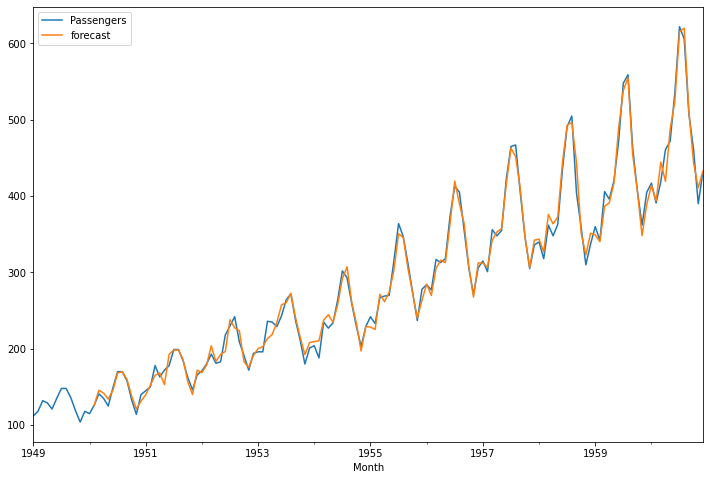

In [97]:
from statsmodels.tsa.ar_model import AutoReg
# fit model
model = AutoReg(df['Passengers'], lags=13)
model_fit = model.fit()
# make prediction
df['forecast'] = model_fit.predict(start=0,end=144)
df[['Passengers','forecast']].plot(figsize=(12,8))

In [98]:
df['forecast_floor'] = df['forecast'].apply(np.floor)
df['forecast_ceil'] = df['forecast'].apply(np.ceil)
def mse(actual, pred,lags): 
    actual = actual[lags:,].to_numpy()
    pred = pred[lags:,].to_numpy()
    return np.square(np.subtract(actual,pred)).mean() 
mse(df['Passengers'],df['forecast_floor'],13)

116.87022900763358

############## NOTE : obeservation 1: lags =13 has the lowest MSE 117.34 ###############

In [99]:
mse(df['Passengers'],df['forecast_ceil'],13)

116.89312977099236

In [49]:
############## NOTE : obeservation 2: lags =17 has the increased from last MSE 104.96 ###############

C:\Users\mayuri.mhetre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mayuri.mhetre\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\mayuri.mhetre\Anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


<AxesSubplot:xlabel='Month'>

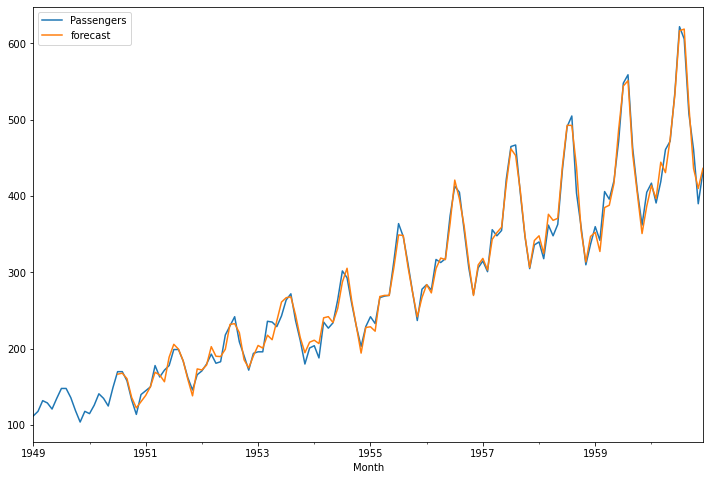

In [50]:
from statsmodels.tsa.ar_model import AutoReg
# fit model
model = AutoReg(df['Passengers'], lags=18)
model_fit = model.fit()
# make prediction
df['forecast'] = model_fit.predict(start=0,end=144)
df[['Passengers','forecast']].plot(figsize=(12,8))

In [51]:
def mse(actual, pred,lags): 
    actual = actual[lags:,].to_numpy()
    pred = pred[lags:,].to_numpy()
    return np.square(np.subtract(actual,pred)).mean() 
mse(df['Passengers'],df['forecast'],18)

105.43502606978198

########### Observation
### lags =14,15 has the lowest MSE value and later on start increasing with inscrease in value of lags

In [75]:
list1 = []
def model_predict(actual, lag):
    model = AutoReg(actual, lags=lag)
    model_fit = model.fit()
    # make prediction
    df['forecast'] = model_fit.predict(start=0,end=144)
    actual = actual[lag:,].to_numpy()
    pred = df['forecast'][lag:,].to_numpy()
    list1.append(np.square(np.subtract(actual,pred)).mean())
for i in range(0,72):
    model_predict(df['Passengers'],i)
    print(i,list1[i])

0 14291.973331404322
1 1107.3841966168618
2 994.3745287132368
3 963.2830693428803
4 949.4445796634208
5 900.593976636867
6 905.5936428259032
7 879.86805799535
8 867.6454103005977
9 636.1134812517657
10 596.1502046110908
11 259.47673104816124
12 182.53756005860723
13 117.34148386546721
14 104.44675384446795
15 104.68887642435598
16 105.15696817706291
17 104.96692655351437
18 105.43502606978198
19 100.57756625138296
20 101.266796806006
21 100.66131641196957
22 91.74009829924816
23 87.78707895569207
24 88.14322664269145
25 86.63651170114142
26 86.11127253399731
27 86.58941658929477
28 85.53515669119072
29 84.48128589444565
30 84.28409243810012
31 79.16291296854216
32 79.4145135586081
33 79.5694891133692
34 75.0244267198957
35 74.36249779604435
36 74.06232649991271
37 74.56115686151851
38 72.64086819971014
39 70.45388981740933
40 67.58482397409105
41 67.77072831141741
42 65.24030179394677
43 62.19107043212267
44 62.476676521559305
45 61.593458151506695
46 59.04321958408512
47 59.1704002441

In [74]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='Month'>

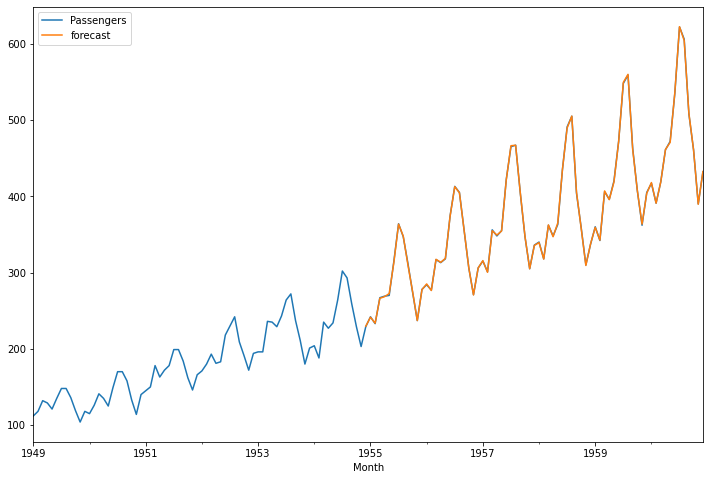

In [76]:
from statsmodels.tsa.ar_model import AutoReg
# fit model
model = AutoReg(df['Passengers'], lags=71)
model_fit = model.fit()
# make prediction
df['forecast'] = model_fit.predict(start=0,end=144)
df[['Passengers','forecast']].plot(figsize=(12,8))

In [77]:
def mse(actual, pred,lags): 
    actual = actual[lags:,].to_numpy()
    pred = pred[lags:,].to_numpy()
    return np.square(np.subtract(actual,pred)).mean() 
mse(df['Passengers'],df['forecast'],71)

0.8285402146920366

In [100]:
### floor or ceil ----> will use floor for discrete value of passenger

In [101]:
len(df)

144

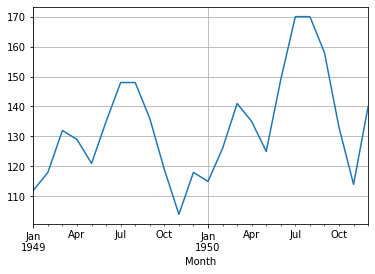

In [106]:
df.Passengers[:24].plot()
plt.grid()

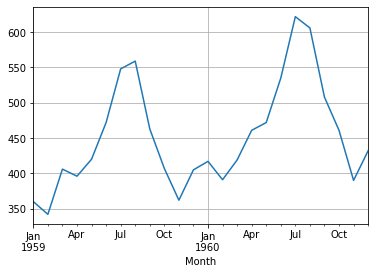

In [111]:
df.Passengers[120:].plot()
plt.grid()

In [114]:
a = df.shape[0]
print(a)

144


In [118]:
train_data = df['Passengers'][0:a-24]
test_data =df['Passengers'][a-24:]

In [119]:
train_data

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1958-08-01    505
1958-09-01    404
1958-10-01    359
1958-11-01    310
1958-12-01    337
Name: Passengers, Length: 120, dtype: int64

In [120]:
test_data

Month
1959-01-01    360
1959-02-01    342
1959-03-01    406
1959-04-01    396
1959-05-01    420
1959-06-01    472
1959-07-01    548
1959-08-01    559
1959-09-01    463
1959-10-01    407
1959-11-01    362
1959-12-01    405
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, dtype: int64

In [121]:
type(train_data)

pandas.core.series.Series

In [122]:
############ lag = 11 is chosen 

In [133]:
from statsmodels.tsa.ar_model import AutoReg
# fit model
model1 = AutoReg(train_data, lags=11)
model_fit1 = model1.fit()
# make prediction
predictions = model_fit1.predict(start=len(train_data),end=len(train_data)+len(test_data)-1)
compare_df = pd.concat(
    [df['Passengers'].tail(24),
    predictions.apply(np.floor)], axis=1).rename(
    columns={'Passengers': 'actual', 0:'predicted'})

In [134]:
compare_df

,actual,predicted
1959-01-01,360,366.0
1959-02-01,342,356.0
1959-03-01,406,387.0
1959-04-01,396,354.0
1959-05-01,420,406.0
1959-06-01,472,470.0
1959-07-01,548,538.0
1959-08-01,559,533.0
1959-09-01,463,448.0
1959-10-01,407,400.0


<AxesSubplot:>

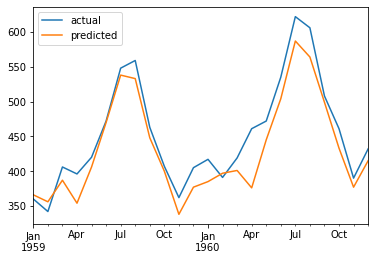

In [135]:
compare_df.plot()

In [137]:
from sklearn.metrics import r2_score

r2 = r2_score(df['Passengers'].tail(24), predictions.apply(np.floor))
print(r2)

0.853721407197373


In [138]:
r2 = r2_score(df['Passengers'].tail(24), predictions.apply(np.ceil))
print(r2)

0.8609837829356585


0.8645701413249353


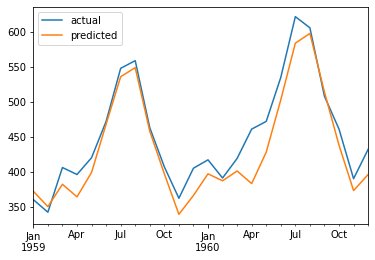

In [139]:
model1 = AutoReg(train_data, lags=12)
model_fit1 = model1.fit()
# make prediction
predictions = model_fit1.predict(start=len(train_data),end=len(train_data)+len(test_data)-1)
compare_df = pd.concat(
    [df['Passengers'].tail(24),
    predictions.apply(np.floor)], axis=1).rename(
    columns={'Passengers': 'actual', 0:'predicted'})
compare_df.plot()
r2 = r2_score(df['Passengers'].tail(24), predictions.apply(np.floor))
print(r2)

0.5703542649646407


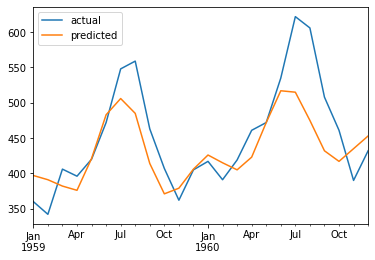

In [146]:
model2 = AutoReg(train_data, lags=10)
model_fit2 = model2.fit()
# make prediction
predictions = model_fit2.predict(start=len(train_data),end=len(train_data)+len(test_data)-1)
compare_df = pd.concat(
    [df['Passengers'].tail(24),
    predictions.apply(np.floor)], axis=1).rename(
    columns={'Passengers': 'actual', 0:'predicted'})
compare_df.plot()
r2 = r2_score(df['Passengers'].tail(24), predictions.apply(np.floor))
print(r2)

-0.4793728355766753


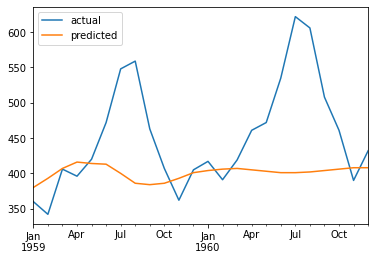

In [147]:
model1 = AutoReg(train_data, lags=8)
model_fit1 = model1.fit()
# make prediction
predictions = model_fit1.predict(start=len(train_data),end=len(train_data)+len(test_data)-1)
compare_df = pd.concat(
    [df['Passengers'].tail(24),
    predictions.apply(np.floor)], axis=1).rename(
    columns={'Passengers': 'actual', 0:'predicted'})
compare_df.plot()
r2 = r2_score(df['Passengers'].tail(24), predictions.apply(np.floor))
print(r2)

############ lag =12 gives the best result while doing prediction for next 24 months

0.9718946858342755


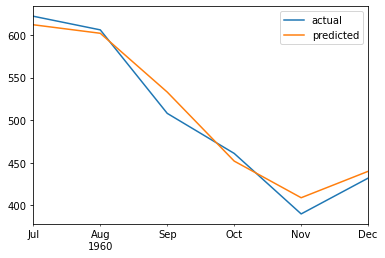

In [152]:
train_data = df['Passengers'][0:a-6]
test_data =df['Passengers'][a-6:]
model1 = AutoReg(train_data, lags=12)
model_fit1 = model1.fit()
# make prediction
predictions = model_fit1.predict(start=len(train_data),end=len(train_data)+len(test_data)-1)
compare_df = pd.concat(
    [df['Passengers'].tail(6),
    predictions.apply(np.floor)], axis=1).rename(
    columns={'Passengers': 'actual', 0:'predicted'})
compare_df.plot()
r2 = r2_score(df['Passengers'].tail(6), predictions.apply(np.floor))
print(r2)

0.9704522318594508


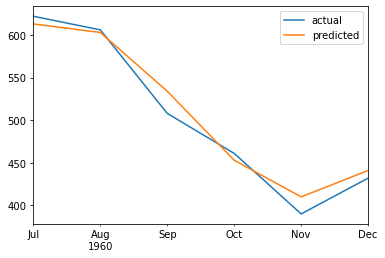

In [154]:
train_data = df['Passengers'][0:a-6]
test_data =df['Passengers'][a-6:]
model1 = AutoReg(train_data, lags=12)
model_fit1 = model1.fit()
# make prediction
predictions = model_fit1.predict(start=len(train_data),end=len(train_data)+len(test_data)-1)
compare_df = pd.concat(
    [df['Passengers'].tail(6),
    predictions.apply(np.ceil)], axis=1).rename(
    columns={'Passengers': 'actual', 0:'predicted'})
compare_df.plot()
r2 = r2_score(df['Passengers'].tail(6), predictions.apply(np.ceil))
print(r2)

0.9674997088797317


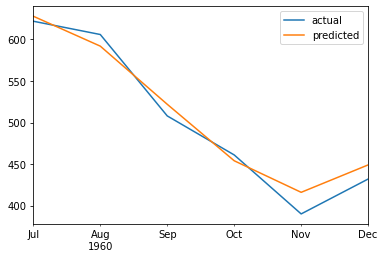

In [153]:
train_data = df['Passengers'][0:a-6]
test_data =df['Passengers'][a-6:]
model1 = AutoReg(train_data, lags=11)
model_fit1 = model1.fit()
# make prediction
predictions = model_fit1.predict(start=len(train_data),end=len(train_data)+len(test_data)-1)
compare_df = pd.concat(
    [df['Passengers'].tail(6),
    predictions.apply(np.floor)], axis=1).rename(
    columns={'Passengers': 'actual', 0:'predicted'})
compare_df.plot()
r2 = r2_score(df['Passengers'].tail(6), predictions.apply(np.floor))
print(r2)

0.9654712579776344


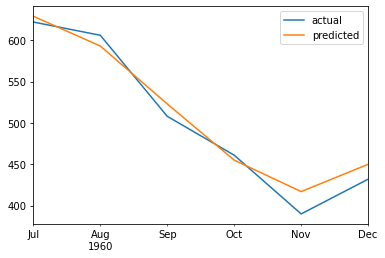

In [155]:
train_data = df['Passengers'][0:a-6]
test_data =df['Passengers'][a-6:]
model1 = AutoReg(train_data, lags=11)
model_fit1 = model1.fit()
# make prediction
predictions = model_fit1.predict(start=len(train_data),end=len(train_data)+len(test_data)-1)
compare_df = pd.concat(
    [df['Passengers'].tail(6),
    predictions.apply(np.ceil)], axis=1).rename(
    columns={'Passengers': 'actual', 0:'predicted'})
compare_df.plot()
r2 = r2_score(df['Passengers'].tail(6), predictions.apply(np.ceil))
print(r2)

while doing predictions for next 6 months

it gave r2_score = 97% for lag =12

and r2_score = 96% for lag=11

floor gives good result than ceil

0.963149808611901


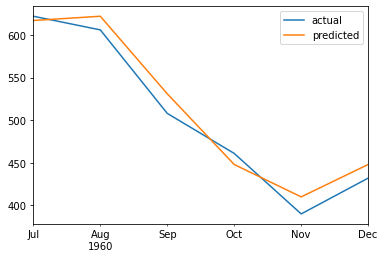

In [191]:
train_data = df['Passengers'][0:a-6]
test_data =df['Passengers'][a-6:]
model1 = AutoReg(train_data, lags=14)
model_fit1 = model1.fit()
# make prediction
predictions = model_fit1.predict(start=len(train_data),end=len(train_data)+len(test_data)-1)
compare_df = pd.concat(
    [df['Passengers'].tail(6),
    predictions.apply(np.floor)], axis=1).rename(
    columns={'Passengers': 'actual', 0:'predicted'})
compare_df.plot()
r2 = r2_score(df['Passengers'].tail(6), predictions.apply(np.floor))
print(r2)

0.9753430523678408


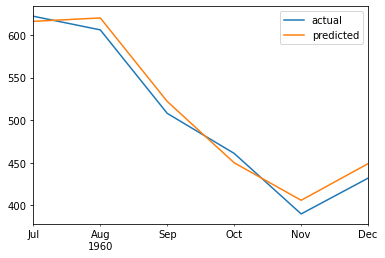

In [159]:
train_data = df['Passengers'][0:a-6]
test_data =df['Passengers'][a-6:]
model1 = AutoReg(train_data, lags=13)
model_fit1 = model1.fit()
# make prediction
predictions = model_fit1.predict(start=len(train_data),end=len(train_data)+len(test_data)-1)
compare_df = pd.concat(
    [df['Passengers'].tail(6),
    predictions.apply(np.floor)], axis=1).rename(
    columns={'Passengers': 'actual', 0:'predicted'})
compare_df.plot()
r2 = r2_score(df['Passengers'].tail(6), predictions.apply(np.floor))
print(r2)

0.6145717902581768


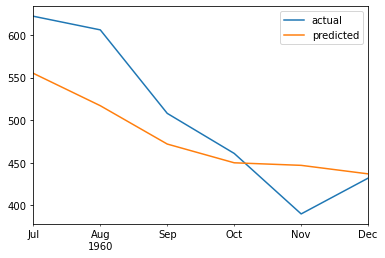

In [169]:
train_data = df['Passengers'][0:a-6]
test_data =df['Passengers'][a-6:]
model1 = AutoReg(train_data, lags=10)
model_fit1 = model1.fit()
# make prediction
predictions = model_fit1.predict(start=len(train_data),end=len(train_data)+len(test_data)-1)
compare_df = pd.concat(
    [df['Passengers'].tail(6),
    predictions.apply(np.floor)], axis=1).rename(
    columns={'Passengers': 'actual', 0:'predicted'})
compare_df.plot()
r2 = r2_score(df['Passengers'].tail(6), predictions.apply(np.floor))
print(r2)

0.9753881290545541


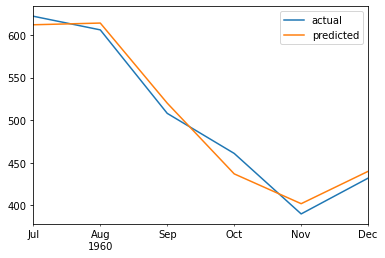

In [186]:
train_data = df['Passengers'][0:a-6]
test_data =df['Passengers'][a-6:]
model1 = AutoReg(train_data, lags=21)
model_fit1 = model1.fit()
# make prediction
predictions = model_fit1.predict(start=len(train_data),end=len(train_data)+len(test_data)-1)
compare_df = pd.concat(
    [df['Passengers'].tail(6),
    predictions.apply(np.floor)], axis=1).rename(
    columns={'Passengers': 'actual', 0:'predicted'})
compare_df.plot()
r2 = r2_score(df['Passengers'].tail(6), predictions.apply(np.floor))
print(r2)

0.9717819941174923


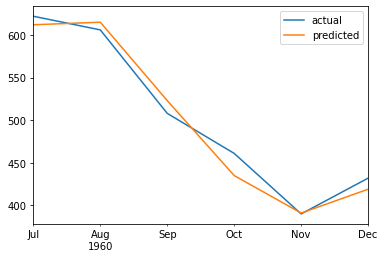

In [187]:
train_data = df['Passengers'][0:a-6]
test_data =df['Passengers'][a-6:]
model1 = AutoReg(train_data, lags=23)
model_fit1 = model1.fit()
# make prediction
predictions = model_fit1.predict(start=len(train_data),end=len(train_data)+len(test_data)-1)
compare_df = pd.concat(
    [df['Passengers'].tail(6),
    predictions.apply(np.floor)], axis=1).rename(
    columns={'Passengers': 'actual', 0:'predicted'})
compare_df.plot()
r2 = r2_score(df['Passengers'].tail(6), predictions.apply(np.floor))
print(r2)

######### lag = 13 gives the r2_score of 97.53%

while doing predictions for next 6 months

it gave r2_score = 97% for lag =12

and r2_score = 96% for lag=11

floor gives good result than ceil

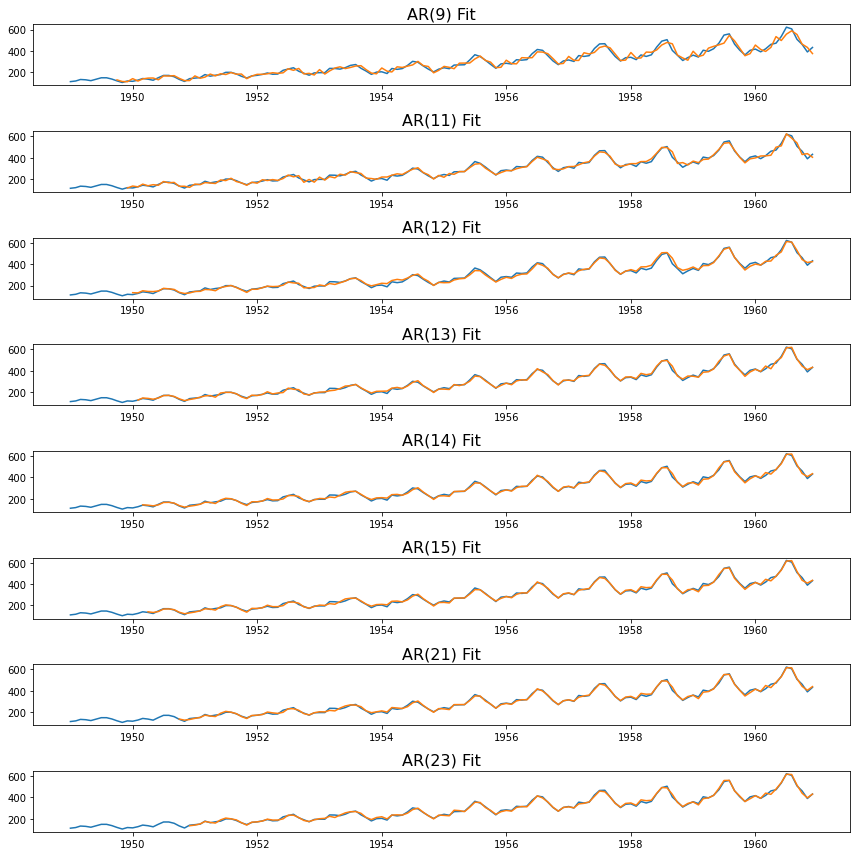

In [188]:
plt.figure(figsize=(12,12))
from statsmodels.tsa.arima_model import ARMA
ar_orders = [9,11,12,13,14,15,21,23]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):
    
    #create AR(p) model
    ar_model = AutoReg(df['Passengers'], lags=ar_order)
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit
    plt.subplot(8,1,idx+1)
    plt.plot(df['Passengers'])
    plt.plot(ar_model_fit.fittedvalues)
    plt.title('AR(%s) Fit'%ar_order, fontsize=16)

plt.tight_layout()
    

In [189]:
#AIC comparison
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))

AIC for AR(9): 6.618339940027551
AIC for AR(11): 5.754155751982146
AIC for AR(12): 5.419077172508399
AIC for AR(13): 4.994095982867713
AIC for AR(14): 4.894831255114046
AIC for AR(15): 4.914558761339967
AIC for AR(21): 4.9857453189062735
AIC for AR(23): 4.888137465793421


In [190]:
#BIC comparison
for ar_order in ar_orders:
    print('BIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))

BIC for AR(9): 6.855066033085497
BIC for AR(11): 6.036671080304573
BIC for AR(12): 5.72482889157059
BIC for AR(13): 5.32331705040983
BIC for AR(14): 5.247758572093195
BIC for AR(15): 5.291433264240342
BIC for AR(21): 5.511600930073474
BIC for AR(23): 5.465780140503492


######## AIC and BIC is less for lag = 14

In [181]:
model_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  138
Model:                    AutoReg(10)   Log Likelihood                -583.883
Method:               Conditional MLE   S.D. of innovations             23.165
Date:                Tue, 21 Sep 2021   AIC                              6.473
Time:                        16:57:15   BIC                              6.740
Sample:                    11-01-1949   HQIC                             6.581
                         - 06-01-1960                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          6.2812      6.039      1.040      0.298      -5.555      18.117
Passengers.L1      1.0482      0.086     12.132      0.000       0.879       1.218
Passengers.L2     -0.3920      0.127     -3.089      0.002      -0.641      -0.143
Passengers.L3      0.1818      0.129      1.408      0.159      -0.071       0.435
Passengers.L4     -0.3140      0.128     -2.444      0.015      -0.566      -0.062
Passengers.L5      0.3448      0.130      2.660      0.008       0.091       0.599
Passengers.L6     -0.2013      0.129     -1.565      0.118      -0.453       0.051
Passengers.L7      0.2224      0.129      1.728      0.084      -0.030       0.475
Passengers.L8     -0.3783      0.132     -2.857      0.004      -0.638      -0.119
Passengers.L9      0.2246      0.132      1.699      0.089      -0.035       0.484
Passengers.L10     0.2716      0.091      2.992      0.003       0.094       0.450
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9976           -0.0000j            0.9976           -0.0000
AR.2             0.8797           -0.5227j            1.0233           -0.0853
AR.3             0.8797           +0.5227j            1.0233            0.0853
AR.4             0.4617           -0.9402j            1.0474           -0.1773
AR.5             0.4617           +0.9402j            1.0474            0.1773
AR.6            -0.3197           -1.0763j            1.1227           -0.2960
AR.7            -0.3197           +1.0763j            1.1227            0.2960
AR.8            -0.9387           -0.6317j            1.1314           -0.4057
AR.9            -0.9387           +0.6317j            1.1314            0.4057
AR.10           -1.9908           -0.0000j            1.9908           -0.5000
------------------------------------------------------------------------------
"""

In [180]:
fitted_model_dict

{11: <statsmodels.tsa.ar_model.AutoRegResultsWrapper at 0x24232b1d370>,
 12: <statsmodels.tsa.ar_model.AutoRegResultsWrapper at 0x24232c0ec10>,
 13: <statsmodels.tsa.ar_model.AutoRegResultsWrapper at 0x24232ce6100>,
 14: <statsmodels.tsa.ar_model.AutoRegResultsWrapper at 0x24232afb070>,
 15: <statsmodels.tsa.ar_model.AutoRegResultsWrapper at 0x2423283e1f0>}

AIC and BIC

AIC = -2/N * LL + 2 * k/N

Where N is the number of examples in the training dataset, 
LL is the log-likelihood of the model on the training dataset, 
and k is the number of parameters in the model.

Compared to the BIC method (below), the AIC statistic penalizes complex models less,
 meaning that it may put more emphasis on model performance on the training dataset, 
and, in turn, select more complex models.

means using AIC most complex model will be selected


BIC

BIC = -2 * LL + log(N) * k
Where log() has the base-e called the natural logarithm, LL is the log-likelihood of the model, 
N is the number of examples in the training dataset, and k is the number of parameters in the model.

Unlike the AIC, the BIC penalizes the model more for its complexity,
meaning that more complex models will have a worse (larger) score and
will, in turn, be less likely to be selected.


BIC ---- less LL, less no of parameters and less no of samples
AIC ---- LL is maximum likelihood , K --- no of parameters --->   -2*LL + 2*K